# BLUE ORIGIN NEW SHEPARD

## Описание математической модели

### №1. Расчет максимальной скорости ракеты

In [1]:
# Модули
import math

Характеристики двигателя BE-3:

In [2]:
# Тяга (в Н)
thrust = 490 * 1000

# Показатель адиабаты  жидкого азота (топливо двигателя)
k = 1.410

# Давление в камере сгорания (в МПа)
pressure = 13.4 * 100000

# Диаметр критического сечения сопла (в метрах)
critical_section_diameter = 0.379

# Площадь критического сечения сопла (в метр^2)
critical_section_area = math.pi * (critical_section_diameter / 2) ** 2

# Температура продуктов сгорания (в Кельвинах)
fuel_combustion_temperature = 3588

# Начальная масса летательного аппарата (полезная нагрузка + конструкция аппарата + топливо) в кг
start_rocket_mass = 75000

# Конечная масса летательного аппарата (полезная нагрузка + конструкция аппарата) в кг = 20569
end_rocket_mass = 24000

Дополнительные константы:

In [3]:
# Ускорение свободного падения
g = 9.8

# Газовая постоянная
R = 8.31

Расчет секундного расхода массы топлива:

In [4]:
def calculate_fuel_consumption(k: float, pressure: float, critical_section_area: float, temperature: float):
    # Коэффициент в выражении для расхода
    a_k = math.sqrt(k) * (2 / (k + 1)) ** ((k + 1)/(2 * (k - 1)))

    # секундный расход массы топлива
    return (a_k * pressure * critical_section_area) / math.sqrt(R * temperature)

Расчет удельного импульса тяги:

In [5]:
def calculate_impulse(thrust: float, fuel_consumption: float):
    return thrust / fuel_consumption

Расчет скорости ракеты под действием тяги ракетного двигателя \
Применим формулу Циолковского:
### $V = I \cdot \ln(\frac{M1}{M2})$
где $V$ — конечная скорость летательного аппарата, которая для случая манёвра в космосе при орбитальных манёврах и межпланетных перелетах часто обозначается ΔV, также именуется характеристической скоростью; \
$I$ — удельный импульс ракетного двигателя (отношение тяги двигателя к секундному расходу массы топлива); \
$M_{1}$ — начальная масса летательного аппарата (полезная нагрузка + конструкция аппарата + топливо); \
$M_{2}$ — конечная масса летательного аппарата (полезная нагрузка + конструкция аппарата).

In [6]:
fuel_consumption = calculate_fuel_consumption(k, pressure, critical_section_area, fuel_combustion_temperature)
impulse = calculate_impulse(thrust, fuel_consumption)

max_speed = impulse * math.log(start_rocket_mass/end_rocket_mass)
print(f"Итоговая теоретическая максимальная скорость = {max_speed} м/с")

Итоговая теоретическая максимальная скорость = 929.0783534827561 м/с


Расчет абсолютной погрешности:

In [7]:
# Максимальная скорость Blue Origin New Shepard в KSP(в м/c)
V_experimental = 893

# Максимальная скорость Blue Origin New Shepard в результате подсчета (в м/с)
V_theoretical = max_speed

abs_error = abs(V_theoretical - V_experimental)
print(f"Абсолютная погрешность расчетов = {abs_error}")

Абсолютная погрешность расчетов = 36.07835348275614


Расчет относительной погрешности:

In [8]:
rel_error = round(abs_error / V_experimental * 100, 2)
print(f"Относительная погрешность расчетов = {rel_error}%")

Относительная погрешность расчетов = 4.04%


### №2. Расчет траектории полета ракеты

In [19]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\newmersedez\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [20]:
# Модули
import math
import numpy as np
import matplotlib.pyplot as plt

Характеристики двигателя BE-3:

In [10]:
# Диаметр ракеты (в метрах)
midel_diameter = 3.7

# Тяга (в Н)
thrust = 490 * 1000 / fuel_consumption

# Начальная масса летательного аппарата (полезная нагрузка + конструкция аппарата + топливо) в кг
start_rocket_mass = 75000

# Конечная масса летательного аппарата
end_rocket_mass = 24000

# Масса топлива
fuel_mass = start_rocket_mass - end_rocket_mass


Дополнительные константы:

In [11]:
# Ускорение свободного падения
g = 9.8

Подсчет идеальной скорости:

In [12]:
def calculate_ideal_speed(thrust: float, start_mass: int, fuel_mass: float):
    return (thrust * fuel_mass * g) / (start_mass - fuel_mass / 2)

Подсчет действительной скорости:

In [13]:
def calculate_actual_speed(ideal_speed: float, time: int, midel_diameter: float, thrust:float, a_coef: float):
    return ideal_speed - g * time - ((midel_diameter ** 2) / thrust) * a_coef

Подсчет высоты активной фазы:

In [14]:
def calculate_active_phase_height(actual_speed: float, time: int):
    return time * actual_speed / 2

Подсчет высоты неактивной фазы:

In [15]:
def calculate_passive_phase_height(actual_speed: float):
    return 0.8 * (actual_speed ** 2) / (2 * g)

Подсчет высоты полета:

In [16]:
def calculate_height(actual_speed: float, time: int):
    return calculate_active_phase_height(actual_speed, time) + calculate_passive_phase_height(actual_speed)

In [17]:
experimental_height = list(range(0, 100000, 1000))
experimental_time = [
    0,   30,  40,  48,  54,  60,  64,  68,  72,  76,
    79,  82,  84,  87,  90,  92,  94,  96,  98,  100,
    102, 104, 105, 107, 109, 110, 111, 113, 115, 117,
    119, 120, 121, 123, 124, 125, 126, 127, 128, 129,
    130, 131, 132, 133, 134, 135, 135, 136, 137, 138,
    139, 140, 141, 142, 143, 145, 146, 147, 148, 149,
    150, 151, 152, 154, 155, 156, 157, 159, 160, 161,
    162, 164, 165, 166, 168, 169, 172, 173, 175, 176,
    178, 179, 181, 183, 184, 186, 187, 188, 189, 191,
    193, 195, 197, 198, 200, 203, 205, 207, 209, 211]

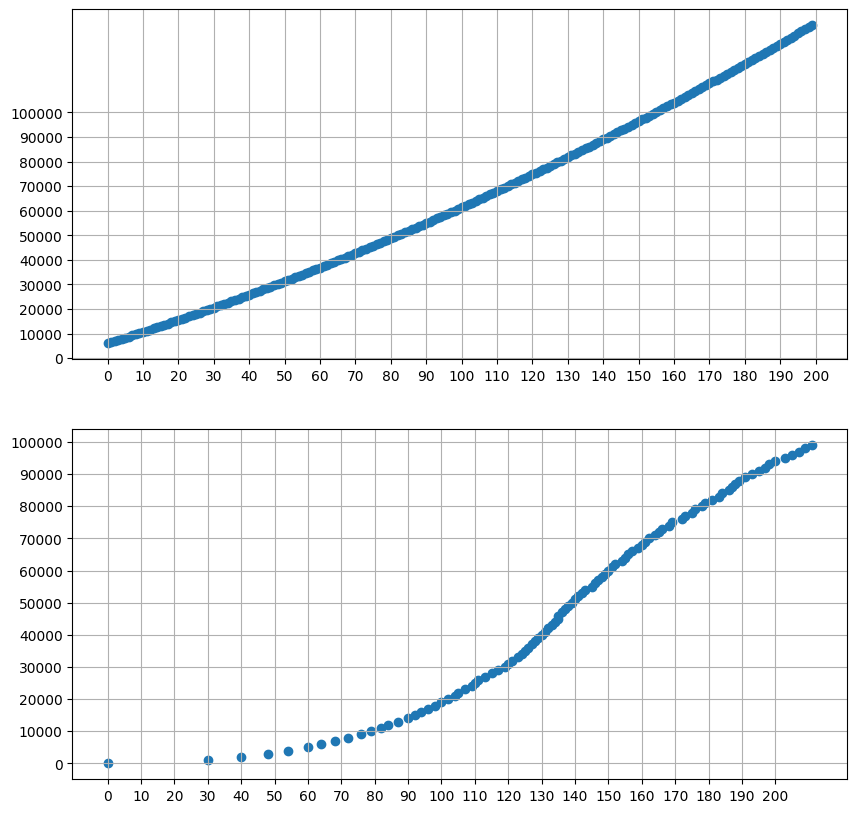

In [18]:
theory_height = []
theory_time = list(range(0, 200, 1))

ideal_speed = calculate_ideal_speed(thrust, start_rocket_mass, fuel_mass)
for time in theory_time:
    actual_speed = calculate_actual_speed(ideal_speed, time, midel_diameter, thrust, 400000)
    height = 100000 - calculate_height(actual_speed, time)
    theory_height.append(height)

fig, (plt1, plt2) = plt.subplots(2, figsize=(10, 10))


plt1.scatter(theory_time, theory_height, )
plt1.set_xticks(np.arange(0, 210, 10))
plt1.set_yticks(np.arange(0, 101000, 10000))
plt1.grid(True)

plt2.scatter(experimental_time, experimental_height)
plt2.set_xticks(np.arange(0, 210, 10))
plt2.set_yticks(np.arange(0, 101000, 10000))
plt2.grid(True)

plt.show()